In [1]:
import pandas as pd
import seaborn as sns

from foolbox.econometrics.misc import descriptives

from src.setup import *

from src.datafeed_.kraken.downstream import get_funding_rate

In [4]:
# carry is the negative of the relative funding rate, ~(spot / fwd - 1)
data_f = get_funding_rate()

carry = data_f \
    .query("rate == 'relative'").drop("rate", axis=1) \
    .set_index("timestamp") \
    .mul(-1)

# there are 6 4-hour periods per day
ann = 365 * 6

<AxesSubplot:xlabel='asset'>

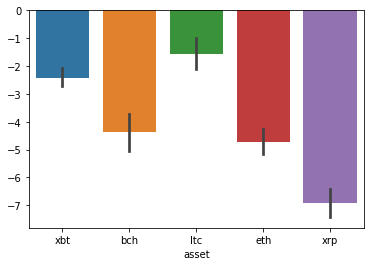

In [5]:
# plot
sns.barplot(data=carry * ann * 100)

In [6]:
# print descriptives (some are meaningless)
carry_d = descriptives(carry, ann=ann, scl=100, cov_lags=30)
print(carry_d)

asset           xbt          bch          ltc          eth          xrp
mean      -2.414034    -4.359907    -1.551790    -4.729721    -6.926105
sterr      0.730872     1.320048     1.200223     0.890605     0.967100
tstat     -3.302948    -3.302841    -1.292919    -5.310685    -7.161725
median    -1.542001    -5.748419    -2.064332    -4.536662    -5.331266
std        0.311516     0.625189     0.509416     0.410767     0.497179
dstd       0.237580     0.385188     0.323799     0.289204     0.387627
q95       18.703203    41.857106    39.021695    25.202153    24.707732
q05      -26.945856   -42.010217   -35.715460   -33.624275   -45.654242
skew      -0.022200     1.138234     0.939842     0.528422    -0.045819
kurt       6.913481     7.117259     6.360254     7.376503     6.107087
sharpe    -7.749319    -6.973738    -3.046215   -11.514354   -13.930797
ac1        0.771727     0.739142     0.807590     0.750871     0.717570
count   7133.000000  7133.000000  7133.000000  7133.000000  7133

In [ ]:
# cryptocurrency returns
